In [89]:
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm, kde, kstest



%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)
data_path = "C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Gmail_df.csv"
data0 = pd.read_csv(data_path)
data_path_write = 'C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\'

In [90]:
data = data0[['time','1day_imap_users']]

In [91]:
data.head()

,time,1day_imap_users
0,2015-03-23 00:00:00-04:00,10463.0
1,2015-03-24 00:00:00-04:00,10510.0
2,2015-03-25 00:00:00-04:00,10453.0
3,2015-03-26 00:00:00-04:00,10496.0
4,2015-03-27 00:00:00-04:00,10419.0


In [92]:
data.describe()

,1day_imap_users
count,1585.000000
mean,9865.966984
std,1731.273048
min,0.000000
25%,9768.000000
50%,10114.000000
75%,10477.000000
max,11849.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D5A55BBA8>]],
      dtype=object)

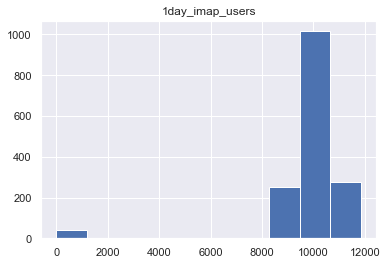

In [93]:
data.hist()

In [101]:
#data = data[(data.T != 0.0).any()]
data = data[data['1day_imap_users'] != 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D57D83080>]],
      dtype=object)

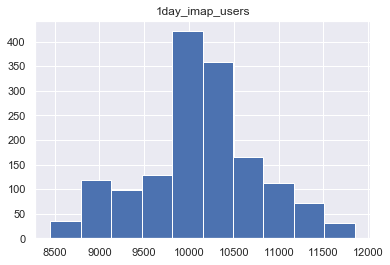

In [102]:
data.hist()

In [117]:
data.describe()

,1day_imap_users
count,1544.000000
mean,10127.951859
std,649.507366
min,8454.000000
25%,9823.500000
50%,10127.000000
75%,10483.750000
max,11849.000000


In [103]:
data['time'] = pd.to_datetime(data['time'],utc=True)
data.set_index('time', inplace=True)


Text(0.5, 0, 'Year')

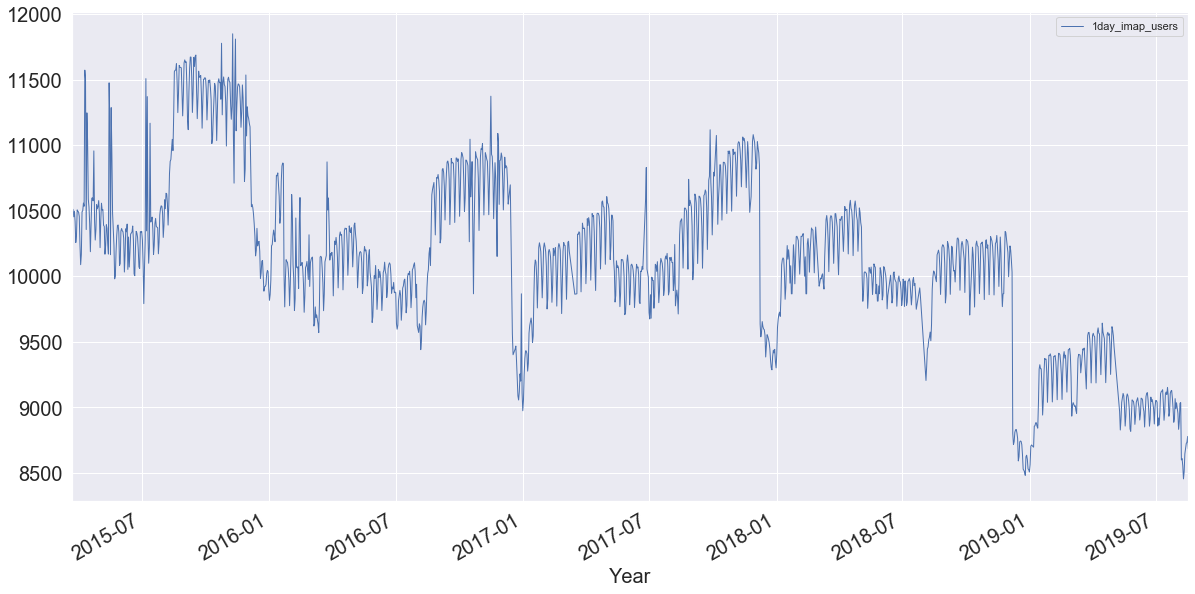

In [104]:
data.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

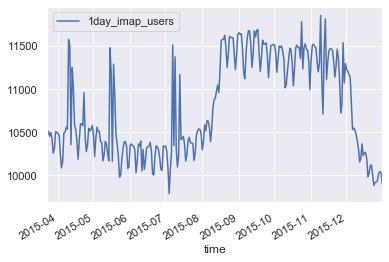

In [105]:
data.loc['2015'].plot()

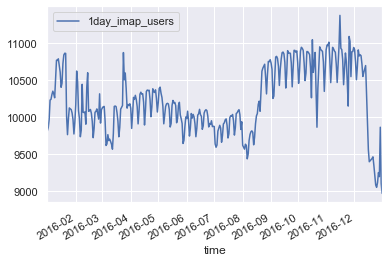

In [106]:
data.loc['2016'].plot()

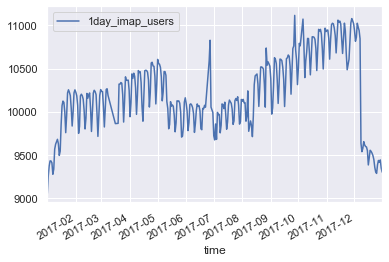

In [107]:
data.loc['2017'].plot()

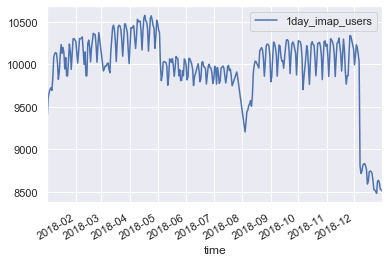

In [108]:
data.loc['2018'].plot()

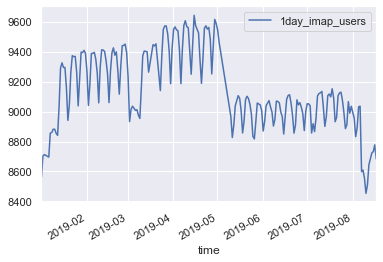

In [109]:
data.loc['2019'].plot()

In [110]:
alpha = norm.fit(data['1day_imap_users'])[0]
beta = norm.fit(data['1day_imap_users'])[1]

In [112]:
oiu = data['1day_imap_users']

In [113]:
density = kde.gaussian_kde(oiu, bw_method=None)

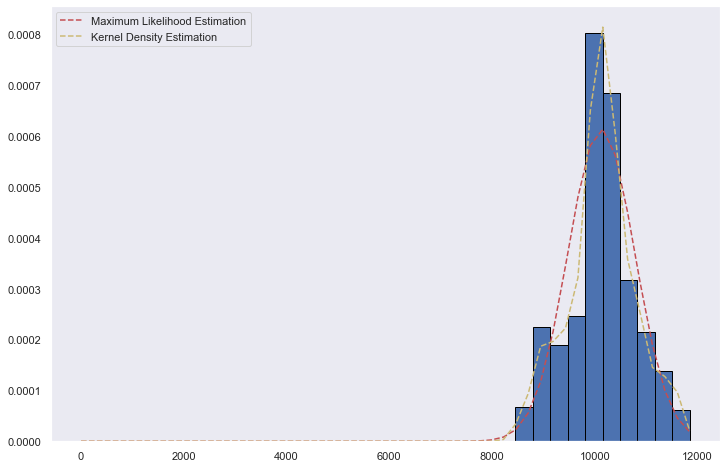

In [123]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)

#l1, = plt.plot(x, norm.pdf(x, alpha[-1], beta[-1]), 'm-', label="Method Of Moments")
l2, = plt.plot(x, norm.pdf(x, alpha, beta), 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l2,l3])

In [118]:
kstest(oiu,density)

KstestResult(statistic=0.9999796850659327, pvalue=0.0)

In [119]:
e = norm(alpha,beta)

In [126]:
kstest(oiu,e.pdf)

KstestResult(statistic=0.9999816843886827, pvalue=0.0)